# K-Means
K-means algorithm is used to find a pre-determined number of clusters within unlabeled multidimensional dataset. To implement this algorithm, let's import the required packages and generate two-dimensional dataset containing four distinct blobs.

<IPython.core.display.Javascript object>


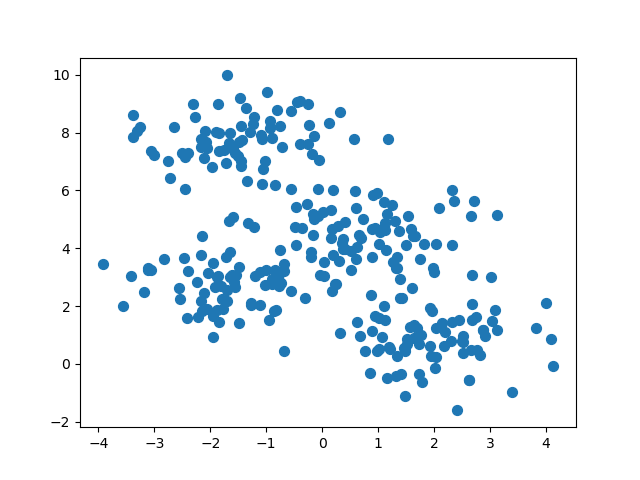

In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.90, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

It is easy to pick four clusters by eye and K-means does this automatically. However, we use 10 random initializations to see which clusters have minimum error.

<IPython.core.display.Javascript object>


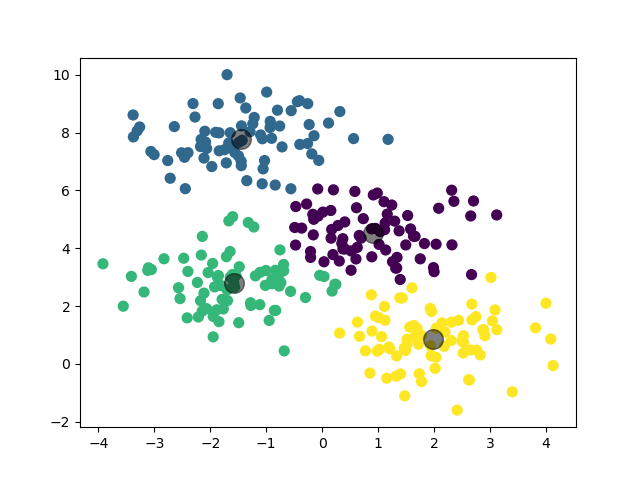

In [36]:
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Exercise
As an exercise, you can try making three clusters with 50 random initializations and see the results.

In [ ]:
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## K-means is limited to linear cluster boundaries
K-means can perform poorly if the clusters have complex shapes like the two_moons data.

<IPython.core.display.Javascript object>


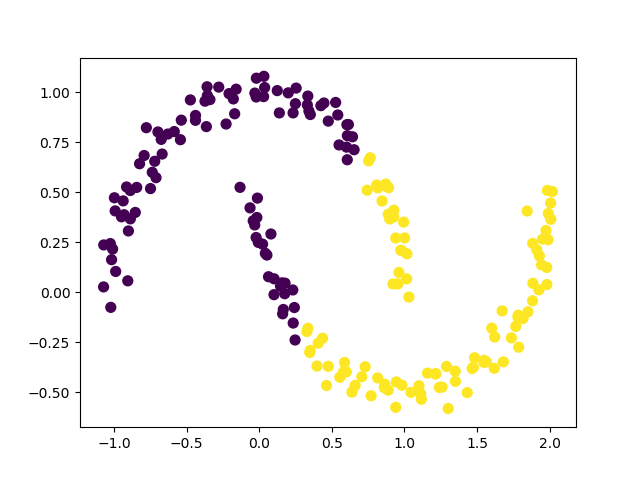

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

One way to solve this is to use kenrelized k-means that can be implemented by `SpectralClustering` estimator.

C:\Users\rashedi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>


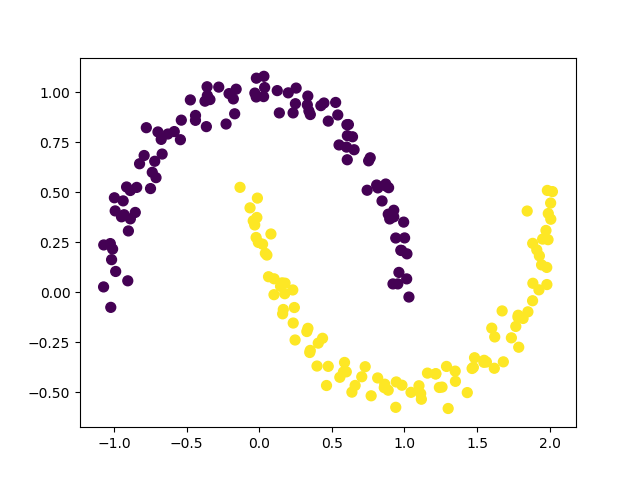

In [29]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# Principal Component Analysis
One of the most common applications of PCA is visualizing high-dimensional datasets. The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign. The malignant class has 212 samples, whereas the benign class has 357 samples. It has 30 features shared across all classes as you can see by running the code below.

In [58]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


Now, we can run PCA to project high dimensional data into low dimensional principal components. In this regard, we normalize the data and fit the PCA to find the principal components. By running the following code, you will see how the shape of original dataset is reduced.

In [64]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x_scaled = StandardScaler().fit_transform(x) # normalizing the features
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x_scaled)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(principalComponents_breast.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


By reducing the dimensionality, we should expect loosing some information. Let's see how much of the information is retained and how much is lost.

In [65]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


This means that the `principal component 1` holds 44.2% of the information and `principal component 2` holds only 19% of the information. Note that by this dimensionality reduction 36.8% of the information is lost. Let's plot the 569 samples along the two principal components.

<IPython.core.display.Javascript object>


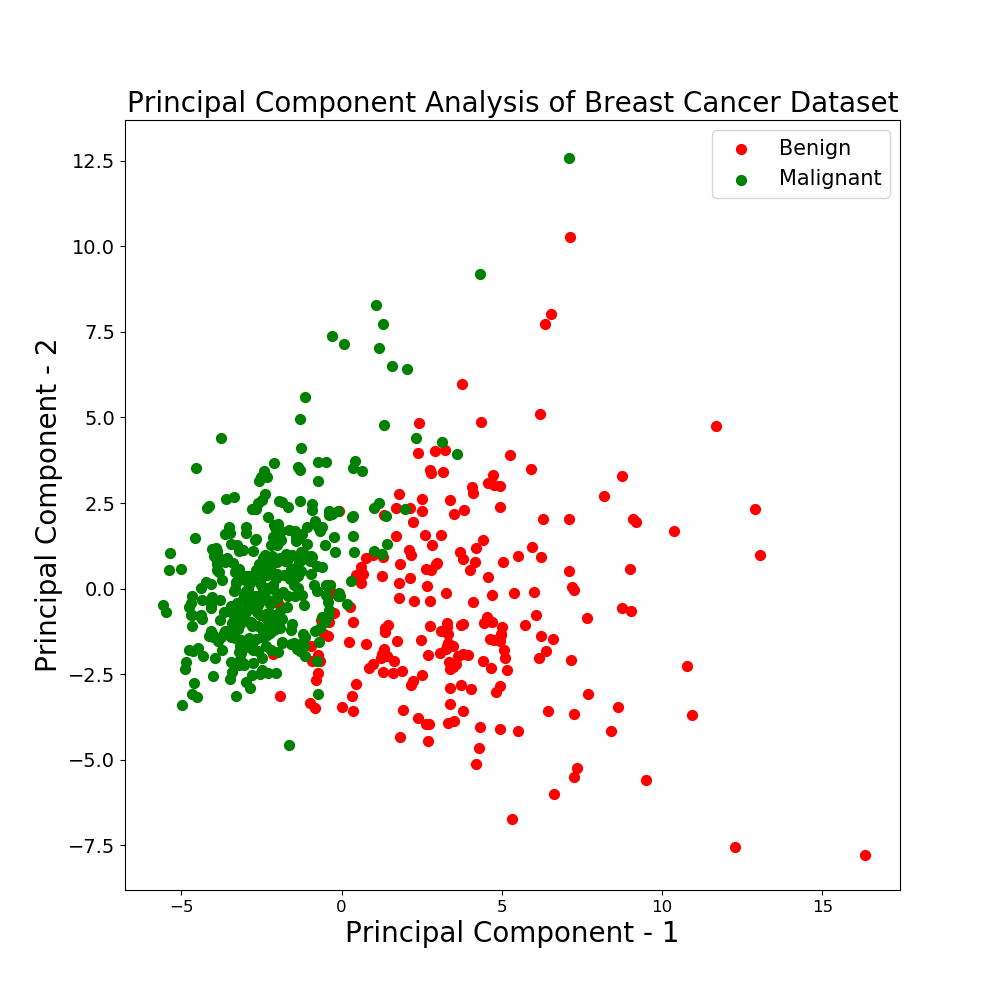

In [62]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})